<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_7_regresion_logistica_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = df.set_axis(col_names, axis='columns')
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#explore shape of data set
df.shape

(768, 9)

In [4]:
df.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [5]:
df.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols] # Features
y = df.label # Target variable

In [23]:
y.value_counts(normalize=True)

label
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [15]:
### crear data para train y test
from sklearn.model_selection import train_test_split ## mantiene la distribución de clases y genera conjuntos de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [16]:
len(X_train),len(X_test)

(576, 192)

In [17]:
len(y_train),len(y_test)

(576, 192)

In [21]:
y_train.value_counts(normalize=True)

label
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

label
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [24]:
#### calibrar clases
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
len(X_resampled), len(y_resampled)

(1000, 1000)

In [26]:
y_resampled.value_counts(normalize=True)

label
1    0.5
0    0.5
Name: proportion, dtype: float64

In [28]:
X_train.describe()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.793403,80.986111,32.163368,32.894097,120.578125,69.098958,0.471050
std,3.326420,115.193341,8.074384,11.377976,32.640772,19.404139,0.327365
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.084000
25%,1.000000,0.000000,27.500000,24.000000,99.000000,64.000000,0.245000
50%,3.000000,36.500000,32.400000,29.000000,116.000000,72.000000,0.379000
75%,6.000000,129.250000,36.800000,40.000000,141.000000,80.000000,0.617250
max,15.000000,744.000000,67.100000,81.000000,198.000000,122.000000,2.420000


In [29]:
### falta escalar la data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6
count,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02,5.760000e+02
mean,9.251859e-18,-3.083953e-17,4.965164e-16,7.401487e-17,3.083953e-18,2.636780e-16,-1.649915e-16
std,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00,1.000869e+00
min,-1.141377e+00,-7.036562e-01,-3.986846e+00,-1.046270e+00,-3.697306e+00,-3.564137e+00,-1.183347e+00
25%,-8.404924e-01,-7.036562e-01,-5.780529e-01,-7.823736e-01,-6.616535e-01,-2.630052e-01,-6.911141e-01
50%,-2.387228e-01,-3.865221e-01,2.933197e-02,-3.425462e-01,-1.403798e-01,1.496363e-01,-2.814298e-01
75%,6.639316e-01,4.193458e-01,5.747388e-01,6.250742e-01,6.261992e-01,5.622778e-01,4.469829e-01
max,3.371895e+00,5.760664e+00,4.330609e+00,4.231659e+00,2.373999e+00,2.728646e+00,5.958613e+00


In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
modelo = LogisticRegression(random_state=16)

# fit the model with data
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1])

In [37]:
len(y_pred), len(y), len(y_test)

(192, 768, 192)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
# Calcular métricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

In [39]:
# Imprimir las métricas de desempeño
print("Métricas de Desempeño:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", roc_auc)
print("AUC-PR:", average_precision)


Métricas de Desempeño:
Accuracy: 0.8125
Precision: 0.803921568627451
Recall: 0.6119402985074627
F1 Score: 0.6949152542372882
AUC-ROC: 0.7659701492537314
AUC-PR: 0.6273686713491367


In [40]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 26,  41]])

Text(0.5, 23.52222222222222, 'Predicted label')

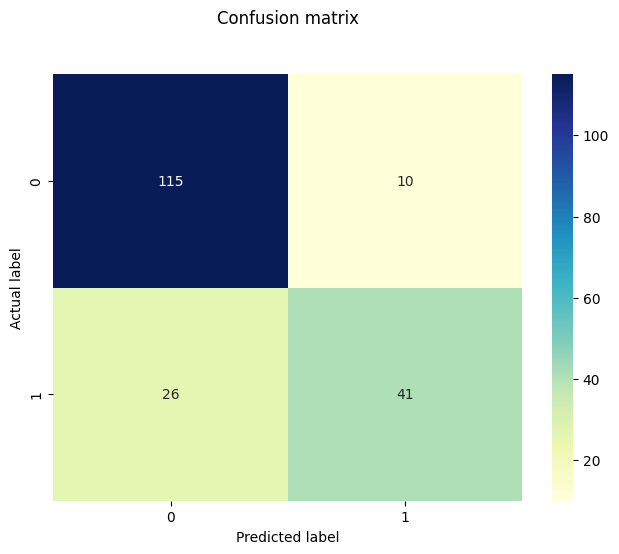

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
X_resampled

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.600000,50,148,72,0.627000
1,1,0,26.600000,31,85,66,0.351000
2,8,0,23.300000,32,183,64,0.672000
3,1,94,28.100000,21,89,66,0.167000
4,0,168,43.100000,33,137,40,2.288000
...,...,...,...,...,...,...,...
995,5,0,31.906102,39,164,64,0.233595
996,5,0,30.990927,29,109,71,0.616707
997,4,154,33.300000,51,171,83,1.196333
998,8,175,34.173097,35,111,81,0.284266


In [44]:
### ahora con smote

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

pd.DataFrame(X_resampled).head(5)

,0,1,2,3,4,5,6
0,0.627998,-0.719053,0.125222,1.404129,0.697480,0.146422,0.433741
1,-0.899977,-0.719053,-0.811626,-0.266197,-1.258507,-0.157043,-0.423705
2,1.239188,-0.719053,-1.253283,-0.178285,1.784140,-0.258199,0.573542
3,-0.899977,0.079206,-0.610873,-1.145316,-1.134317,-0.157043,-0.995336
4,-1.205573,0.707622,1.396659,-0.090373,0.355959,-1.472061,5.593954


In [45]:
# instantiate the model (using the default parameters)
modelo_con_smote = LogisticRegression(random_state=16)

# fit the model with data
modelo_con_smote.fit(X_resampled, y_resampled)

y_pred_smote = modelo.predict(X_resampled)
y_pred_smote

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [46]:
# Calcular métricas de desempeño con SMOTE
accuracy = accuracy_score(y_resampled, y_pred_smote)
precision = precision_score(y_resampled, y_pred_smote)
recall = recall_score(y_resampled, y_pred_smote)
f1 = f1_score(y_resampled, y_pred_smote)
roc_auc = roc_auc_score(y_resampled, y_pred_smote)
average_precision = average_precision_score(y_resampled, y_pred_smote)
# Imprimir las métricas de desempeño con SMOTE
print("Métricas de Desempeño con SMOTE:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Métricas de Desempeño con SMOTE:
Accuracy: 0.706
Precision: 0.8503401360544217
Recall: 0.5
F1 Score: 0.6297229219143577


In [ ]:
# Calcular métricas de desempeño con SMOTE
accuracy = accuracy_score(y_resampled, y_pred_smote)
precision = precision_score(y_resampled, y_pred_smote)
recall = recall_score(y_resampled, y_pred_smote)
f1 = f1_score(y_resampled, y_pred_smote)
roc_auc = roc_auc_score(y_resampled, y_pred_smote)
average_precision = average_precision_score(y_resampled, y_pred_smote)
# Imprimir las métricas de desempeño con SMOTE
print("Métricas de Desempeño con SMOTE:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


In [48]:
X.head(5)

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [47]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

pd.DataFrame(X_scaler).head(5)

,0,1,2,3,4,5,6
0,0.639947,-0.692891,0.204013,1.425995,0.848324,0.149641,0.468492
1,-0.844885,-0.692891,-0.684422,-0.190672,-1.123396,-0.160546,-0.365061
2,1.233880,-0.692891,-1.103255,-0.105584,1.943724,-0.263941,0.604397
3,-0.844885,0.123302,-0.494043,-1.041549,-0.998208,-0.160546,-0.920763
4,-1.141852,0.765836,1.409746,-0.020496,0.504055,-1.504687,5.484909


In [53]:
# instantiate the model (using the default parameters)
modelo_con_data_inicial = LogisticRegression(random_state=16)

# fit the model with data
modelo_con_data_inicial.fit(X_scaler, y)

y_pred_data_real = modelo_con_data_inicial.predict(X_scaler)


In [54]:
# Calcular métricas de desempeño con SMOTE
accuracy = accuracy_score(y, y_pred_data_real)
precision = precision_score(y, y_pred_data_real)
recall = recall_score(y, y_pred_data_real)
f1 = f1_score(y, y_pred_data_real)
roc_auc = roc_auc_score(y, y_pred_data_real)
average_precision = average_precision_score(y, y_pred_data_real)
# Imprimir las métricas de desempeño con SMOTE
print("Métricas de Desempeño con data inicial:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Métricas de Desempeño con data inicial:
Accuracy: 0.78515625
Precision: 0.7440758293838863
Recall: 0.585820895522388
F1 Score: 0.6555323590814196


In [55]:
cnf_matrix = metrics.confusion_matrix(y, y_pred_data_real)
cnf_matrix

array([[446,  54],
       [111, 157]])

Text(0.5, 23.52222222222222, 'Predicted label')

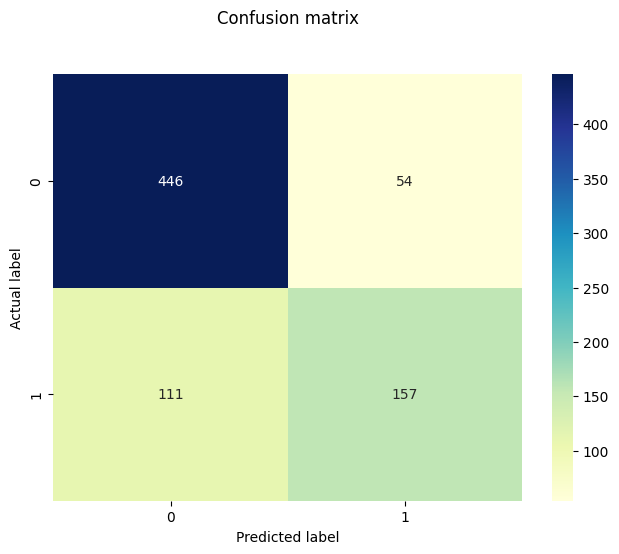

In [56]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')